In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [347]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df ['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format = '%d-%m-%y', errors='coerce')
df['Season'] = df['Last Payment Date'].dt.month.apply(get_season)

all_seasons = ['Winter', 'Spring', 'Summer', 'Fall']
cancellation_by_season = cancellation_by_season.reindex(all_seasons, fill_value=0)
print(cancellation_by_season)
        

Season
Winter       0
Spring       0
Summer    2500
Fall         0
Name: count, dtype: int64


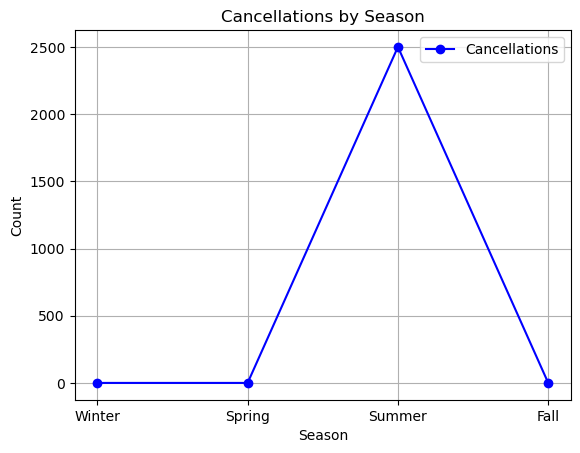

In [393]:
plt.plot(all_seasons, cancellation_by_season, label='Cancellations', marker='o', linestyle='-', color='blue')
plt.title('Cancellations by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig('Cancellations by Season.png', dpi=300, bbox_inches='tight')
plt.show()

In [351]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y', errors='coerce')
df['Join Season'] = df['Join Date'].dt.month.apply(get_season)

subscriptions_by_season = df['Join Season'].value_counts()
print(subscriptions_by_season)

Join Season
Fall      1193
Summer    1161
Spring      88
Winter      58
Name: count, dtype: int64


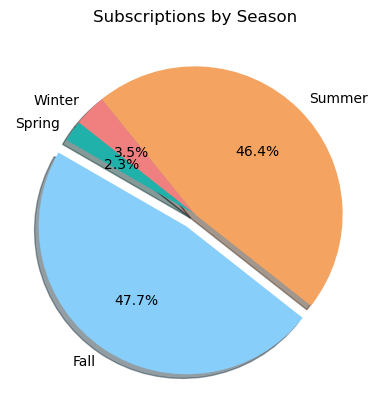

In [391]:
labels = ["Fall", "Summer", "Winter", "Spring"]
sizes = [1193, 1161, 88, 58]
colors = ["lightskyblue", "sandybrown", "lightcoral", "lightseagreen"]
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('Subscriptions by Season')
plt.savefig('Subscriptions by Season.png', dpi=300, bbox_inches='tight')
plt.show()

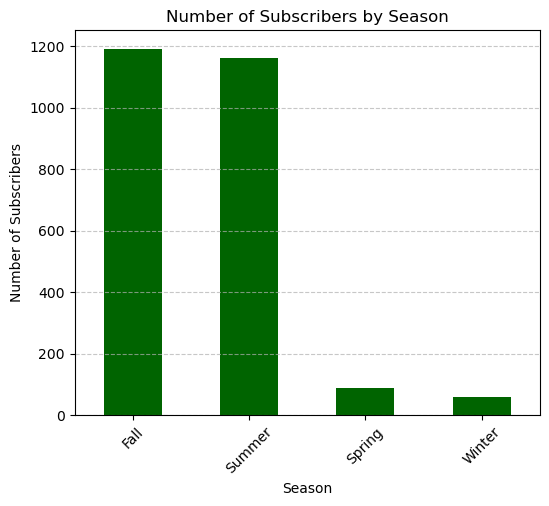

In [389]:
subscriptions_by_season.plot(kind='bar', color='darkgreen', figsize=(6,5))
plt.title('Number of Subscribers by Season')
plt.xlabel('Season')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Number of Subscribers by Season.png', dpi=300, bbox_inches='tight')
plt.show() 

In [357]:
difference_by_season = subscriptions_by_season / cancellation_by_season * 100
print(difference_by_season)

Fall        inf
Spring      inf
Summer    46.44
Winter      inf
Name: count, dtype: float64


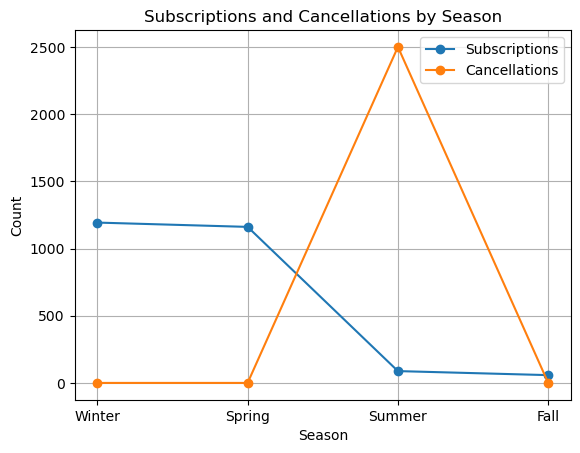

In [387]:
plt.plot(all_seasons, subscriptions_by_season, label='Subscriptions', marker='o')
plt.plot(all_seasons, cancellation_by_season, label='Cancellations', marker='o')
plt.title('Subscriptions and Cancellations by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig('Subscriptions and Cancellations by Season.png', dpi=300, bbox_inches='tight')
plt.show()

In [361]:
#Which countries have the highest number of users?
top_5_countries = df['Country'].value_counts().head(5)
print(top_5_countries)

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Name: count, dtype: int64


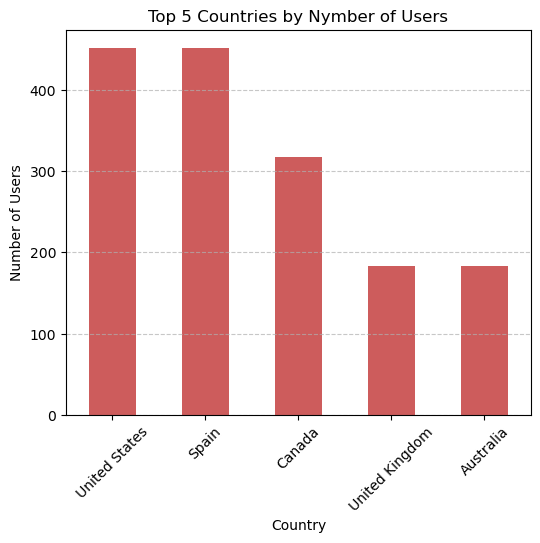

In [395]:
top_5_countries.plot(kind='bar', color='indianred', figsize=(6,5))
plt.title('Top 5 Countries by Nymber of Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Top_5_Countries_by_Number_of_Users.png', dpi=300, bbox_inches='tight')
plt.show()                  

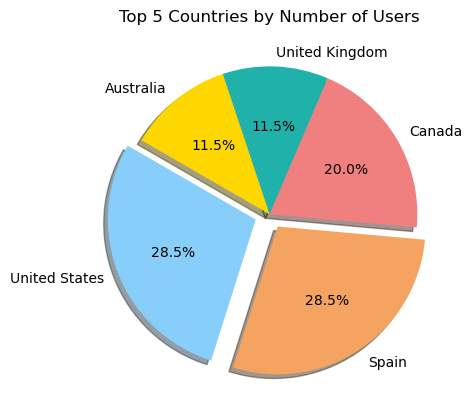

In [397]:
labels = ["United States", "Spain", "Canada", "United Kingdom", "Australia"]
sizes = [451, 451, 317, 183, 183]
colors = ["lightskyblue", "sandybrown", "lightcoral", "lightseagreen", "gold"]
explode = (0.1, 0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Top 5 Countries by Number of Users')
plt.savefig('Top_5_Countries_by_Number_of_Users_pie.png', dpi=300, bbox_inches='tight')
plt.show()

In [367]:
#How is the percentage of payments distributed across different countries?

payments_by_country = df.groupby('Country')['Monthly Revenue'].sum()
total_payments = payments_by_country.sum()
percentage_payments_by_country = (payments_by_country / total_payments) * 100
percentage_payments_by_country = percentage_payments_by_country.sort_values(ascending=False)
print(percentage_payments_by_country)

Country
United States     18.112628
Spain             18.106233
Canada            12.631512
United Kingdom     7.412619
Italy              7.409421
France             7.377442
Brazil             7.307090
Australia          7.262320
Germany            7.227143
Mexico             7.153593
Name: Monthly Revenue, dtype: float64


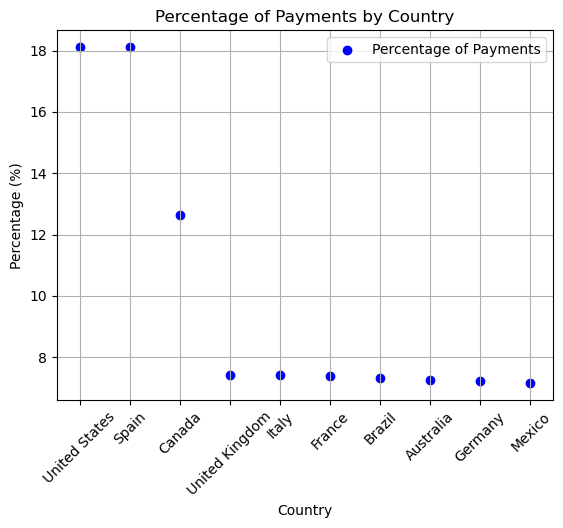

In [381]:
plt.scatter(percentage_payments_by_country.index, percentage_payments_by_country.values, color='blue', label='Percentage of Payments')
plt.title('Percentage of Payments by Country')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.savefig('percentage_of_payments_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

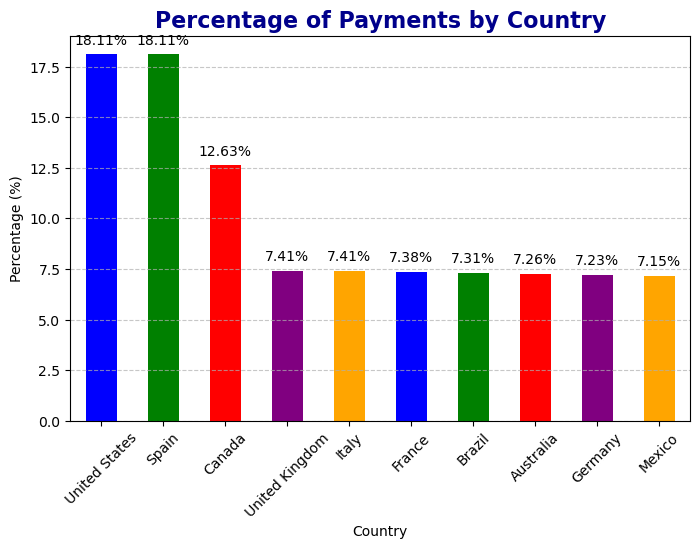

In [399]:
ax = percentage_payments_by_country.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'], figsize=(8, 5))
plt.title('Percentage of Payments by Country', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(percentage_payments_by_country.values):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

plt.savefig('percentage_payments_by_country_bar.png', dpi=300, bbox_inches='tight')
plt.show()